<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **이변량 분석 ① - 수치형  → 수치형**

- 시각화와 수치화 방법으로 두 수치형 변수 간 관계를 분석해 봅니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/two_var_01.png' width=600 align='left'/>

## **1. 환경준비**

- 사용할 라이브러리와 분석 대상 데이터를 읽어옵니다.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [5]:
# AirQuality 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


In [7]:
# Insurance 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance.csv'
insurance = pd.read_csv(path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**📋 데이터 정보**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정 수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

## **2. 시각화**

- **상관분석**은 수치형 변수 x에 대한 수치형 변수 y의 관계를 분석할 때 사용됩니다.
- 두 수치형 변수 관계는 **산점도**를 사용해 시각화 합니다.
- 가설: 온도(x)가 상승하면 아이스크림 판매량(y)이 증가한다.
    - 어떤 관계가 보이나요?
    - 얼마나 강한 관계인가요?
- 두 수치형 변수의 관계를 비교할 때 중요한 관점이 **직선(Linearity)**입니다.


<img src='https://raw.githubusercontent.com/Jangrae/img/master/scatter.png' width=500 align='left'/>

### **2.1. 산점도**

- **산점도(Scatter Plot)**는 두 변수 간의 관계를 나타내는 그래프입니다.
- 각각의 변수는 x축과 y축에 위치하여 점으로 나타내어집니다.
- 이 **점들의 분포 형태**를 통해 두 변수 간의 **상관관계**를 파악할 수 있습니다.
- 두 변수 간의 관계가 선형적인지, 또는 어떤 패턴이 있는지 파악하는 데 매우 유용합니다.
- 예를 들어, x값이 증가할 때 y값도 증가하는 선형적인 관계라면 양의 상관관계가 있다고 볼 수 있습니다.
- **Matplotlib**의 **scatter()** 함수로 산점도를 그립니다.

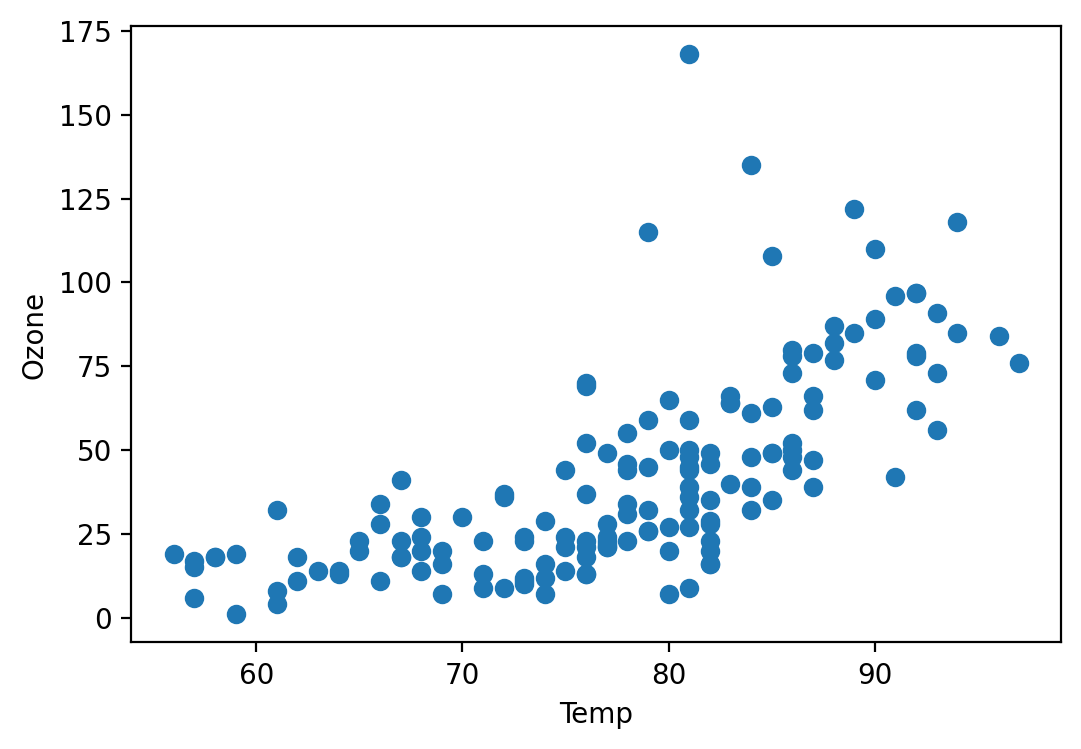

In [8]:
plt.scatter(x='Temp', y='Ozone', data=air)
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.show()

In [ ]:
plt.scatter(x='Wind', y='Ozone', data=air)
plt.xlabel('Wind')
plt.ylabel('Ozone')
plt.show()

- **Seaborn**의 **scatterplot()** 함수로 산점도를 그립니다.

In [ ]:
sns.scatterplot(x='Temp', y='Ozone', data=air)
plt.show()

In [ ]:
sns.scatterplot(x='Wind', y='Ozone', data=air, s=30, ec=None)
plt.show()

- **질문:** 그래프를 그렸으면, 그래프로부터 정보를 파악해야 합니다. 무엇이 보이나요?

In [ ]:
# 두 변수가 상관관계를 가짐

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

insurance 데이터프레임의 다음 변수들의 관계를 산점도로 시각화해 확인하세요.

**1️⃣ age → charges**

**2️⃣ bmi → charges**

**3️⃣ children → charges**

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

**2) 두 변수의 관계**

- 산점도에서 또렷한 패턴이 보인다면 강한 관계로 볼 수 있습니다.
- 특히 직선 패턴이 보인다면 더욱 그렇습니다.

<img src='https://cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width=800 align='left'/>

### **2.2. Pair Plot**

- **Seaborn**의 **pairplot()** 함수는 데이터프레임의 모든 숫자형 변수 쌍에 대한 **산점도**와 **히스토그램**을 같이 그려줍니다.
- 단, 변수가 많아지면 산점도 행렬이 너무 커져서 시각화하기 어려울 수 있습니다.
- 변수가 많아지면 그만큼 **시간도 많이 걸립니다.**
- **변수 중 일부만 선택해 시각화**하거나, 다른 시각화 방법을 사용하는 것이 더 좋을 수 있습니다.

In [ ]:
sns.pairplot(air)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

*️⃣ insurance 데이터프레임의 모든 숫자형 변수에 대해 상관관계를 pairplot() 함수로 시각화해 확인하세요.

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

###  **2.3. Joint Plot**

- **Seaborn**의 **jointplot()** 함수는 두 개의 변수 사이의 관계를 시각화하기 위한 유용한 도구입니다.
- 기본적으로 **산점도**를 그려주고, **히스토그램**으로 각 변수의 분포를 보여줍니다.
- **KDE**(Kernel Density Estimation) 그래프를 추가하여 밀도 추정 결과도 확인할 수 있습니다.
- **kind** 매개변수를 사용하여 **reg, hex, kde** 등 다양한 형태의 그래프를 그릴 수 있습니다.

**1) Temp → Ozone**

In [ ]:
sns.jointplot(x='Temp', y='Ozone', data=air)
plt.show()

**2) Wind → Ozone**

In [ ]:
sns.jointplot(x='Wind', y='Ozone', data=air, kind='scatter')
plt.show()

**3) Solar.R → Ozone**

In [ ]:
sns.jointplot(x='Solar.R', y='Ozone', data=air, kind='hex', marginal_kws=dict(bins=20))
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

In [ ]:
# 데이터 확인
insurance.head()

insurance 데이터프레임의 다음 변수들의 관계를 jointplot() 함수로 시각화해 확인하세요.

**1️⃣ age → charges**

**2️⃣ bmi → charges**

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## **3. 수치화**

- 수치형 → 수치형 관계를 수치화해 비교하고자 한다면 **상관분석**을 수행합니다.
- **상관계수**와 **p-value**를 사용해 두 변수의 상관관계를 확인할 수 있습니다.
- 상관계수 𝑟
    - 두 변수 간의 선형 관계의 강도와 방향을 측정하는 통계적인 지표입니다.
    - -1부터 1 사이의 값을 가집니다.
    - 절댓값이 1에 가까울수록 강한 선형 관계, 0에 가까울수록 약한 선형 관계를 나타냅니다.
- 경험에 의한 대략의 기준(절대적인 기준이 절대 아닙니다)은 다음과 같습니다.
    - 강함: 0.5 < |𝑟| ≤ 1
    - 중간: 0.2 < |𝑟| ≤ 0.5
    - 약함: 0.1 < |𝑟| ≤ 0.2
    - (거의)없음: |𝑟| ≤ 0.1
- **scipy.stats** 라이브러리의 **pearsonr()** 함수로 상관계수를 확인합니다.

In [9]:
result = spst.pearsonr(air['Temp'], air['Ozone'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])

PearsonRResult(statistic=np.float64(0.6833717861490116), pvalue=np.float64(2.1977698002001854e-22))
* 상관계수: 0.6833717861490116
* p-value: 2.1977698002001854e-22


- 결과의 첫 번째 값이 상관계수, 두 번째 값이 p-value 입니다.
    - 귀무가설: 상관 관계가 없다.(상관계수가 0이다.)
    - 대립가설: 상관 관계가 있다.(상관계수가 0이 아니다.)

In [10]:
result = spst.pearsonr(air['Wind'], air['Ozone'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])

PearsonRResult(statistic=np.float64(-0.6054782354684076), pvalue=np.float64(1.1255146087637916e-16))
* 상관계수: -0.6054782354684076
* p-value: 1.1255146087637916e-16


- **주의**: 결측치가 있으면 계산되지 않습니다. 반드시 .notnull()로 제외하고 수행해야 합니다.

    ~~~python
    예) air2 = air.loc[air['Solar.R'].notnull()]
    ~~~

In [11]:
air2 = air.loc[air['Solar.R'].notnull()]
result = spst.pearsonr(air2['Solar.R'], air2['Ozone'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])

PearsonRResult(statistic=np.float64(0.2800681334905376), pvalue=np.float64(0.0006175878788566504))
* 상관계수: 0.2800681334905376
* p-value: 0.0006175878788566504


- Pandas의 **corr()** 메소드를 사용해 상관계수를 확인할 수 있습니다.

In [12]:
air.corr(numeric_only=True)

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.280068,-0.605478,0.683372
Solar.R,0.280068,1.000000,-0.056792,0.275840
Wind,-0.605478,-0.056792,1.000000,-0.457988
Temp,0.683372,0.275840,-0.457988,1.000000


- 위 결과에서 가운데 역대각선 방향에 표시된 1은 같은 변수 간 관계이므로 의미가 없습니다.
- 상관계수의 절대값이 **1에 가까울 수록 강한 상관관계**, **0에 가까울 수록 약한 상관관계**입니다.
- **+** 는 양의 상관관계, **-** 는 음의 상관관계를 의미합니다.

- **Seaborn**의 **heatmap()** 함수로 상관계수를 시각화 할 수 있습니다.

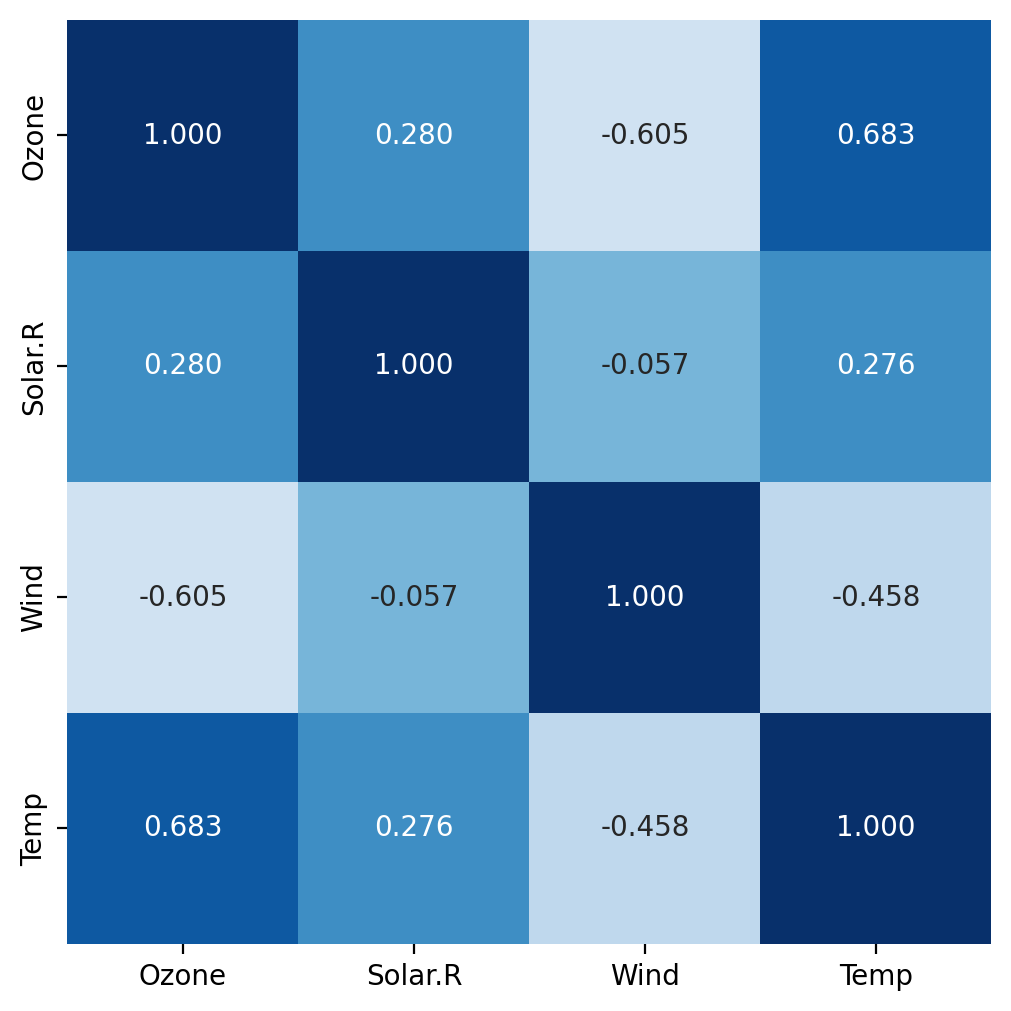

In [13]:
plt.figure(figsize=(6, 6))
sns.heatmap(air.corr(numeric_only=True),
            annot=True,
            fmt='.3f',
            cmap='Blues',
            vmin=-1,
            vmax=1,
            square=True,
            cbar=False)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

insurance 데이터프레임의 다음 변수들 간의 상관계수와 p-value를 살펴보세요.

**1️⃣ age → charges**

In [ ]:
result = spst.pearsonr(insurance['age'], insurance['charges'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])

PearsonRResult(statistic=np.float64(0.2990081933306476), pvalue=np.float64(4.886693331718192e-29))
* 상관계수: 0.2990081933306476
* p-value: 4.886693331718192e-29


**2️⃣ bmi → charges**

In [19]:

result = spst.pearsonr(insurance['bmi'], insurance['charges'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])

PearsonRResult(statistic=np.float64(0.1983409688336289), pvalue=np.float64(2.459085535116766e-13))
* 상관계수: 0.1983409688336289
* p-value: 2.459085535116766e-13


**3️⃣ children → charges**

In [18]:

result = spst.pearsonr(insurance['children'], insurance['charges'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])

PearsonRResult(statistic=np.float64(0.06799822684790482), pvalue=np.float64(0.01285212852013628))
* 상관계수: 0.06799822684790482
* p-value: 0.01285212852013628


- **질문:** 차트로 보는 것과 상관계수로 비교하는 것에 차이가 있나요?

In [ ]:
# 가시성의 차이만이 존재한다고 보임

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## **4. 상관계수의 한계**

- 상관계수에는 한계가 있습니다.
- 아래 그림에서 숫자는 상관계수입니다.
- 맨 아래 줄은 관계가 있어보이는데 상관계수는 0입니다.



<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png' width=800/>


- 데이터 사우루스를 사용해 상관계수의 한계를 살펴봅니다.
    - 데이터 사우루스 패키지는 13개의 데이터셋으로 구성되어 있습니다.
    - 모든 데이터셋의 평균, 표준편차, 상관관계 등의 기본적인 통계량은 동일합니다.
    - 하지만 그래프나 분포 등의 시각적인 특성이 서로 다릅니다.

In [20]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/datasaurus.csv'
ds = pd.read_csv(path)
ds.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [21]:
ds['dataset'].value_counts()

dataset
dino          142
away          142
h_lines       142
v_lines       142
x_shape       142
star          142
high_lines    142
dots          142
circle        142
bullseye      142
slant_up      142
slant_down    142
wide_lines    142
Name: count, dtype: int64

- 아래 5개 그룹의 수치화 결과(상관계수)를 보고 x와 y에 관계가 있는지 판단해 봅니다.

In [22]:
ds_names = ['dino','x_shape', 'star', 'circle', 'bullseye' ]

for i, d in enumerate(ds_names) :
    temp_ds = ds.loc[ds['dataset']==d]
    corr = spst.pearsonr(temp_ds['x'], temp_ds['y'])
    print(f'[그룹{i}] 상관계수: {corr[0]:.4f}, p-value: {corr[1]:.4f}')

[그룹0] 상관계수: -0.0645, p-value: 0.4459
[그룹1] 상관계수: -0.0656, p-value: 0.4381
[그룹2] 상관계수: -0.0630, p-value: 0.4566
[그룹3] 상관계수: -0.0683, p-value: 0.4190
[그룹4] 상관계수: -0.0686, p-value: 0.4173


- **질문:** 5개 그룹 중 x와 y가 서로 관련이 있는 것은?

In [ ]:
#

- **질문:** 5개 그룹 중 x와 y가 가장 관련이 있는 것은?

In [ ]:
#

- 그렇다면, 이제 그래프들을 관찰해 봅니다.

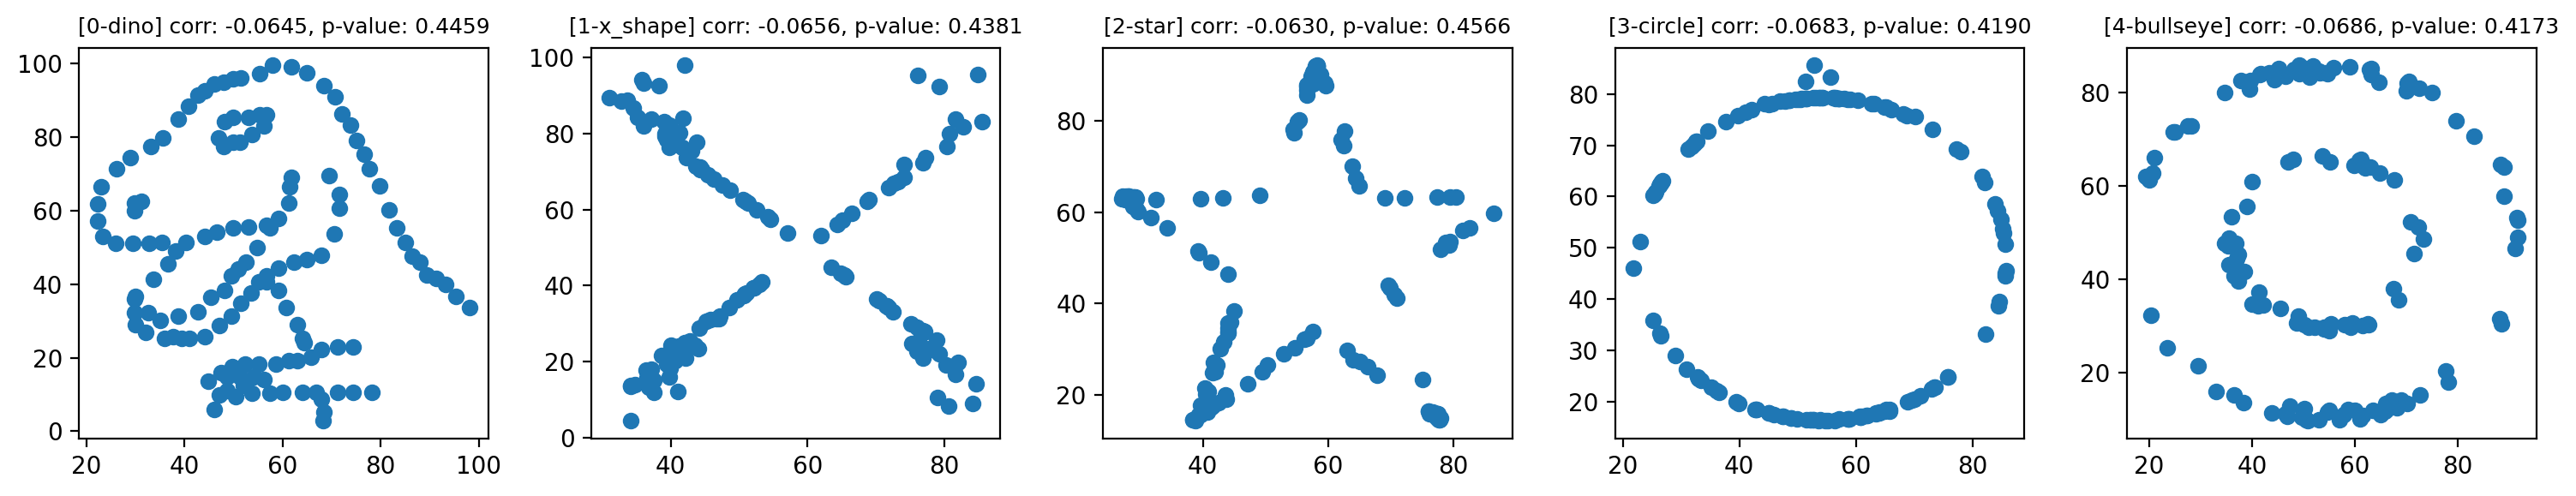

In [23]:
plt.figure(figsize=(15, 3))
for i, d in enumerate(ds_names) :
    temp_ds = ds.loc[ds['dataset']==d]
    corr = spst.pearsonr(temp_ds['x'], temp_ds['y'])
    plt.subplot(1, 5, i + 1)
    plt.scatter(temp_ds['x'], temp_ds['y'])
    plt.title(f'[{i}-{d}] corr: {corr[0]:.4f}, p-value: {corr[1]:.4f}', size=9)
plt.tight_layout()
plt.show()


- **질문:** 어떤 패턴이 있나요? 아니면 아무런 패턴도 없나요?

- **질문:** 어떤 신호가 있나요? 아니면 노이즈만 있나요?

- 이렇듯, 수치화해서 하나의 숫자로 요약하는 데에는 많은 장점이 있지만, 한계도 분명히 있음을 알아야 합니다.